In [23]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent  
sys.path.insert(0, str(PROJECT_ROOT))

In [24]:
import pandas as pd 
from src.diagnostic import pre_stat, missingness_matrix, numerical_check
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path




In [25]:

DATA_DIR=PROJECT_ROOT/'data'/'raw'

df_baseline=pd.read_csv(DATA_DIR / 'MigraineBaselineVars.csv',sep=';')

df_longitudinal=pd.read_csv(DATA_DIR / 'MigraineLongitudianlVars.csv', sep=';')
    


In [26]:
pre_stat(df_baseline)

,fraction_missing,count_missing,unique_value
SUBJECT_ID,0.000000,0,179
AGE,0.000000,0,51
SEX,0.000000,0,2
DIAGNOSIS,0.000000,0,3
Suspension,0.000000,0,2
MONTHS_OF_TREAT,0.000000,0,27
TREATMENT_DISC,0.000000,0,5
AGE_OF_ONSET,0.061453,11,32
AGE_W_CHRONICMIGRAINE,0.061453,11,39
FAMILIARITY,0.525140,94,2


In [27]:
issues = numerical_check(df_baseline, exclude={"SUBJECT_ID"})

context_cols = ["SUBJECT_ID", "AGE", "AGE_OF_ONSET", "AGE_W_CHRONICMIGRAINE", "WEIGTH", "HEIGTH", "BMI"]

for col, info in issues.items():
    idx = info["extreme_values"].index
    cols_to_show = [c for c in context_cols if c in df_baseline.columns]
    if col not in cols_to_show:
        cols_to_show.append(col)

    print(f"\n=== {col} ===")
    print(df_baseline.loc[idx, cols_to_show].to_string(index=False))





=== AGE ===
 SUBJECT_ID  AGE  AGE_OF_ONSET  AGE_W_CHRONICMIGRAINE  WEIGTH  HEIGTH   BMI
         63   18          11.0                    6.0     NaN     NaN   NaN
         88    3          10.0                   17.0    53.0    1.64 19.71
         98  123          15.0                   10.0    73.0    1.72 24.68
        107  123          18.0                   13.0     NaN     NaN   NaN

=== MONTHS_OF_TREAT ===
 SUBJECT_ID  AGE  AGE_OF_ONSET  AGE_W_CHRONICMIGRAINE  WEIGTH  HEIGTH   BMI  MONTHS_OF_TREAT
         92   63          13.0                   47.0    69.0    1.55 28.72                3

=== AGE_OF_ONSET ===
 SUBJECT_ID  AGE  AGE_OF_ONSET  AGE_W_CHRONICMIGRAINE  WEIGTH  HEIGTH   BMI
          3   30           4.0                    5.0    59.0    1.65 21.67
         36   60          46.0                    5.0    50.0    1.65 18.37
         59   53          53.0                   23.0     NaN     NaN   NaN
        136   31           3.0                   25.0     NaN     NaN 

# missing values 


In [28]:
missing_pattern_baseline=missingness_matrix(df_baseline)
missing_pattern_longitudinal=missingness_matrix(df_longitudinal)

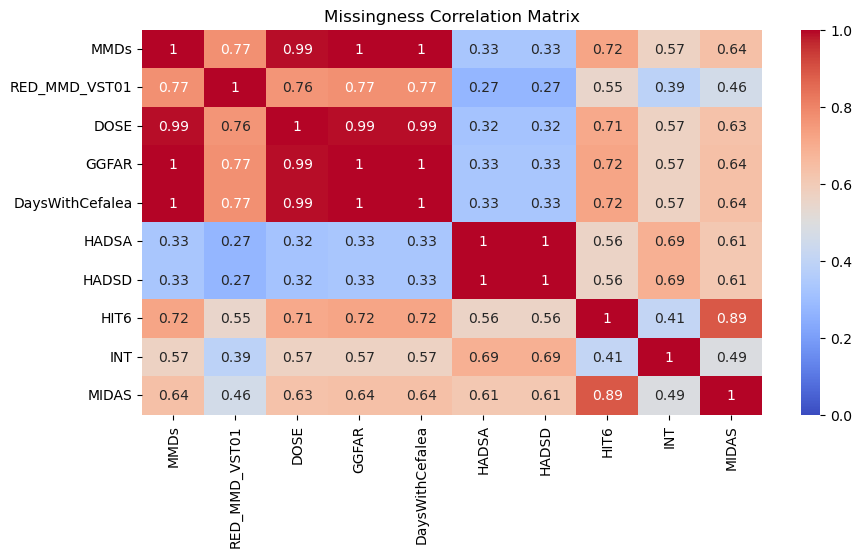

In [29]:
plt.figure(figsize=(10, 5))
sns.heatmap(missing_pattern_longitudinal,
            annot=True,
            cmap="coolwarm",
            vmin=0,
            vmax=1
    )
plt.title("Missingness Correlation Matrix")
plt.show()

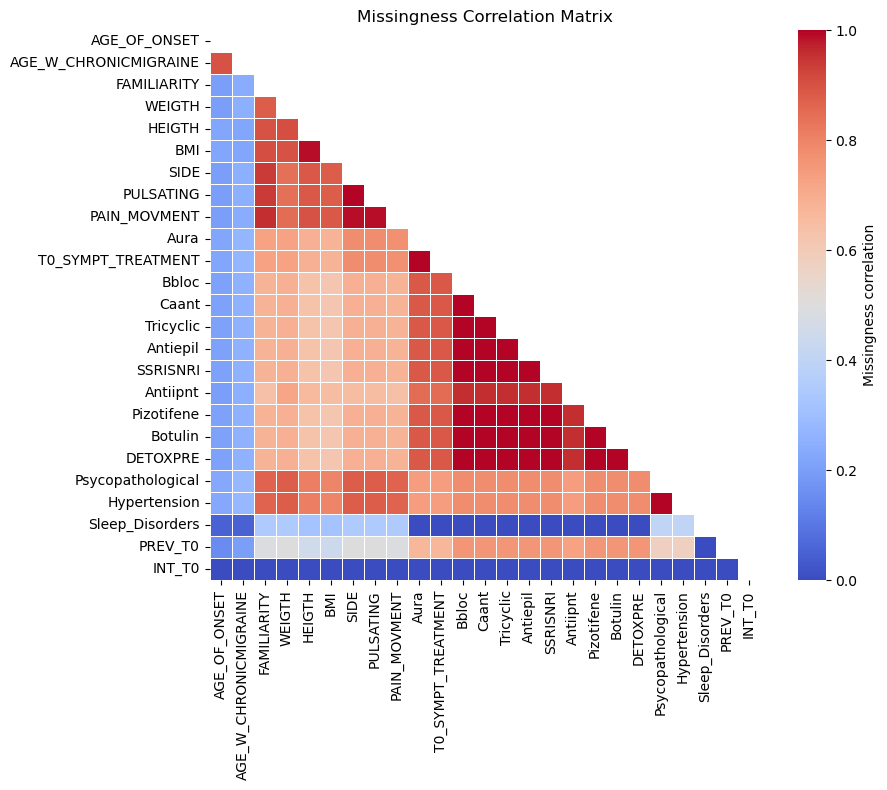

In [30]:
import numpy as np

mask = np.triu(np.ones_like(missing_pattern_baseline, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    missing_pattern_baseline,
    mask=mask,
    cmap="coolwarm",
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Missingness correlation"}
)
plt.title("Missingness Correlation Matrix")
plt.tight_layout()
plt.show()


In [31]:
df_baseline[df_baseline["AGE_W_CHRONICMIGRAINE"] == 47]

,SUBJECT_ID,AGE,SEX,DIAGNOSIS,Suspension,MONTHS_OF_TREAT,TREATMENT_DISC,AGE_OF_ONSET,AGE_W_CHRONICMIGRAINE,FAMILIARITY,...,Antiipnt,Pizotifene,Botulin,DETOXPRE,Psycopathological,Hypertension,Sleep_Disorders,PREV_T0,GGCEF_T0,INT_T0
91,92,63,1,1,1,3,INEFFICACIA,13.0,47.0,1.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,28,NaN
